# Guia de Estudo: Compreendendo a Arquitetura VGG_UNET
## Questionário
1) Qual a função principal do arquivo VGG_UNET.py?
2) Descreva a relação entre os arquivos train.py e data_utils.py no processo de treinamento da rede neural.
3) O que se pode esperar encontrar no arquivo inference_sample.py?
4) Com base nos nomes dos arquivos, qual a arquitetura de rede neural utilizada neste projeto? Descreva suas características principais.
5) Para que serve a arquitetura UNET em aplicações de aprendizado de máquina? Cite exemplos de áreas onde ela se destaca.
6) Explique a importância do processo de treinamento em uma rede neural. Como ele se relaciona com os arquivos mencionados?
7) O que são dados de treinamento e como o arquivo data_utils.py pode auxiliar nesse processo?
8) Deduza a partir dos nomes dos arquivos qual a linguagem de programação utilizada neste projeto. Justifique sua resposta.
9) Qual a provável finalidade do arquivo readme.md no contexto deste projeto?
10) Imagine que você precisa modificar o conjunto de dados utilizado no treinamento. Qual arquivo você precisaria editar? Por quê?

## Gabarito
- O arquivo VGG_UNET.py define a arquitetura da rede neural, especificando as camadas, funções de ativação e outros parâmetros do modelo.
- O arquivo train.py é responsável por executar o processo de treinamento da rede neural, utilizando os dados preparados pelo arquivo data_utils.py.
- O arquivo inference_sample.py provavelmente contém um exemplo de como utilizar a rede neural treinada para realizar inferências em novos dados.
- A arquitetura utilizada é a VGG_UNET, uma combinação da rede VGG (rede convolucional profunda) com a arquitetura UNET (eficiente para segmentação de imagens).
- A arquitetura UNET é comumente utilizada para tarefas de segmentação de imagens, como em imagens médicas, detecção de objetos e processamento de imagens de satélite.
- O treinamento é a etapa onde a rede neural "aprende" a partir dos dados fornecidos, ajustando seus parâmetros para realizar a tarefa desejada. O arquivo train.py executa o processo, utilizando a arquitetura definida em VGG_UNET.py e os dados preparados por data_utils.py.
- Dados de treinamento são o conjunto de exemplos utilizados para treinar a rede neural. O arquivo data_utils.py auxilia no processamento, organização e carregamento desses dados para o treinamento.
- A linguagem de programação utilizada é provavelmente Python, visto que a extensão ".py" é comumente associada a arquivos de código Python.
- O arquivo readme.md serve como um guia introdutório ao projeto, contendo informações sobre os arquivos, como utilizá-los e outras informações relevantes.
- Para modificar o conjunto de dados, seria necessário editar o arquivo data_utils.py, pois ele é responsável por carregar e preparar os dados para o treinamento.
  
## Questões para Dissertação
- Discuta as vantagens e desvantagens de utilizar a arquitetura VGG_UNET em comparação com outras arquiteturas de redes neurais para tarefas de segmentação de imagens.
- Explique em detalhes como o processo de treinamento da rede neural é realizado no contexto dos arquivos mencionados. Quais parâmetros são ajustados e como o desempenho da rede é avaliado?
- Descreva o papel das funções de ativação em uma rede neural e discuta a importância da escolha adequada dessas funções para o sucesso do treinamento.
- Com base nos nomes dos arquivos, especule sobre o tipo de dados que este projeto utiliza para treinamento e inferência. Que tipo de pré-processamento de dados pode ser necessário para preparar os dados para a rede neural?
- Imagine que você precisa integrar este projeto a um sistema maior. Descreva como você faria a interface entre a rede neural treinada e outros componentes do sistema, considerando os arquivos mencionados.
## Glossário
- VGG_UNET: Arquitetura de rede neural que combina a rede VGG com a arquitetura UNET, geralmente utilizada para segmentação de imagens.
- Rede Neural: Modelo computacional inspirado no cérebro humano, capaz de aprender a partir de dados e realizar tarefas como classificação, regressão e segmentação.
- Treinamento: Processo de ajuste dos parâmetros da rede neural para que ela aprenda a realizar a tarefa desejada.
- Dados de Treinamento: Conjunto de dados utilizado para treinar a rede neural.
- Inferência: Processo de utilizar a rede neural treinada para realizar predições em novos dados.
- Segmentação de Imagens: Tarefa de dividir uma imagem em diferentes regiões, cada uma representando um objeto ou classe diferente.
- Função de Ativação: Função matemática que introduz não-linearidade na rede neural, permitindo que ela aprenda relações complexas nos dados.
- Python: Linguagem de programação popularmente utilizada em projetos de aprendizado de máquina e ciência de dados.

# Instalação de Pacotes

In [4]:
%pip install numpy
%pip install matplotlib
%pip install torch
%pip install torchvision
%pip install utils2
%pip install opencv-python

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


# Importe os módulos necessários

In [5]:
# Bibliotecas
import os
import os.path as osp
import glob
import json
import numpy as np
import cv2
import torch
import torchvision
from torch.utils.data import Dataset, DataLoader
import matplotlib
matplotlib.use('agg')
import matplotlib.pyplot as plt


# Declaração de Variáveis

In [11]:
from torch.utils.data import DataLoader

# CUDA:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Caminho do diretório Dataset:
directory = os.path.abspath(os.path.join(os.getcwd(), '..')) + r'\dataset\nematode'
print(f'Diretório do Projeto {directory}.')
if not os.path.exists(directory):
    os.makedirs(directory)
img_folder_val = directory + r'\Val'
img_folder_train = directory + r'\Train'
img_folder_test = directory + r'\Test'
save_dir = directory + r'\\result_unet\\'
if not os.path.exists(img_folder_val):
    os.makedirs(img_folder_val)
if not os.path.exists(img_folder_train):
    os.makedirs(img_folder_train)
if not os.path.exists(img_folder_test):
    os.makedirs(img_folder_test)
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# Local onde o Modelo será salvo
model_file_name = save_dir + 'model_unet.pth'

# size mismatch (got input: [1, 3, 480, 640] , target: [1, 960, 1280]
resolution_input = (640, 480) # Size Out (1280, 960)

patience = 30
plot_val = True
plot_train = True

max_epochs = 100

#Width x Height - MUST be divisible by 32
class_weights = [1, 1, 1]
nClasses = 3

# Color in RGB
class_to_color = {'Ground': (127, 0, 0) , 'Healthy': (0, 127, 127), 'Pest': (0, 255, 0)}
class_to_id = {'Ground': 0, 'Healthy': 1, 'Pest': 2}
id_to_class = {v: k for k, v in class_to_id.items()}


Diretório do Projeto c:\Mestrado\Materias\2024-02-Sistemas para Processamento Multimidia\seminario\image-segmentation\dataset\nematode.


# Clase para Segmentação de Dataset

    Este arquivo provavelmente contém funções utilitárias para manipular e preparar os dados para o treinamento do modelo. As utilidades de dados aqui podem incluir:
        - Carregamento de dados de diferentes fontes (arquivos, bancos de dados, APIs).
        - Limpeza e pré-processamento de dados (por exemplo, lidar com valores ausentes, normalização, conversão de tipos de dados).
        - Aumento de dados para aumentar o tamanho do conjunto de dados de treinamento.
        - Divisão dos dados em conjuntos de treinamento, validação e teste.

In [12]:
class SegmentationDataset(Dataset):
    """Segmentation dataset loader."""

    def __init__(self, json_folder, img_folder, is_train, class_to_id, resolution_input = (640, 480), augmentation = False, transform=None):
    #def __init__(self, json_folder, img_folder, is_train, class_to_id, resolution_input = (1280, 960), augmentation = False, transform=None):
        """
        Args:
            json_folder (str): Path to folder that contains the annotations.
            img_folder (str): Path to all images.
            is_train (bool): Is this a training dataset ?
            augmentation (bool): Do dataset augmentation (crete artificial variance) ?
        """

        self.gt_file_list = glob.glob(osp.join(json_folder, '*.json'))

        self.total_samples = len(self.gt_file_list)
        self.img_folder = img_folder
        self.is_train = is_train
        self.transform = transform
        self.augmentation = augmentation
        self.resolution = resolution_input
        self.class_to_id = class_to_id
        
        
        # Mean and std are needed because we start from a pre trained net
        self.mean = [0.485, 0.456, 0.406]
        self.std = [0.229, 0.224, 0.225]

    def __len__(self):
        return self.total_samples

    def __getitem__(self, idx):
        
        gt_file = self.gt_file_list[idx]
        img_number_str = gt_file.split('.')[0].split('/')[-1]
	# Abre Json
        gt_json = json.load(open(gt_file, 'r'))
	# Abre imagem
        img_np = cv2.imread(osp.join(self.img_folder, img_number_str + '.png'), cv2.IMREAD_IGNORE_ORIENTATION + cv2.IMREAD_COLOR)
        original_shape = img_np.shape
        img_np = cv2.resize(img_np, (self.resolution[0], self.resolution[1]))[..., ::-1]
        img_np = np.ascontiguousarray(img_np)
	# Cria imagem zerada
        label_np = np.zeros((img_np.shape[0], img_np.shape[1]))
        label_np[...] = -1
        
	# Para todos poligonos
        for shape in gt_json['shapes']:
            # Transforma os pontos do poligono em array
            points_np = np.array(shape['points'], dtype = np.float64)

	    # Ajusta os pontos porque eu mudo o resolucao (pode ignorar)
            points_np[:, 0] *= self.resolution[0]/original_shape[1]
            points_np[:, 1] *= self.resolution[1]/original_shape[0]
	    # As coordenadas dos pontos que formam o poligono tem que ser inteiros
            points_np = np.round(points_np).astype(np.int64)
	    # Coloca os pontos no formato certo para o opencv
            points_np = points_np.reshape((-1,1,2))
	    # Pinta o poligono usando o opencv com o valor referente ao label
            label_np = cv2.fillPoly(label_np, [points_np], self.class_to_id[shape['label']])

        # Transforma o GT em inteiro    
        label_np = label_np.astype(np.int32)
        
        if self.is_train and self.augmentation:
            if np.random.rand() > 0.5:
                img_np = np.fliplr(img_np)
                label_np = np.fliplr(label_np)
                img_np = np.ascontiguousarray(img_np)
                label_np = np.ascontiguousarray(label_np)
        
        img_pt = img_np.astype(np.float32) / 255.0
        for i in range(3):
            img_pt[..., i] -= self.mean[i]
            img_pt[..., i] /= self.std[i]
            
        img_pt = img_pt.transpose(2,0,1)
            
        img_pt = torch.from_numpy(img_pt)
        label_pt = torch.from_numpy(label_np).long()
        #print(img_number_str, img_pt.shape)

        sample = {'image': img_pt, 'gt': label_pt, 'image_original': img_np}

        if self.transform:
            sample = self.transform(sample)

        return sample

# VGG_UNET

In [13]:
class UNetVgg(torch.nn.Module):
    """
    BorderNetwork is a NN that aims to detected border and classify occlusion.
    The architecture is a VGG without the last pool layer. After that we 
    have two paths, one for regression and one for classification (occlusion).
    """
    
    def __init__(self, nClasses):
        super(UNetVgg, self).__init__()
        
        vgg16pre = torchvision.models.vgg16(pretrained=True)
        self.vgg0 = torch.nn.Sequential(*list(vgg16pre.features.children())[:4])
        self.vgg1 = torch.nn.Sequential(*list(vgg16pre.features.children())[4:9])
        self.vgg2 = torch.nn.Sequential(*list(vgg16pre.features.children())[9:16])
        self.vgg3 = torch.nn.Sequential(*list(vgg16pre.features.children())[16:23])
        self.vgg4 = torch.nn.Sequential(*list(vgg16pre.features.children())[23:30])
        
        
        self.smooth0 = torch.nn.Sequential(
                torch.nn.Conv2d(128, 64, kernel_size=(3,3), stride=1, padding=(1, 1)),
                torch.nn.ReLU(True),
                torch.nn.Conv2d(64, 64, kernel_size=(3,3), stride=1, padding=(1, 1)),
                torch.nn.ReLU(True)
                )
        self.smooth1 = torch.nn.Sequential(
                torch.nn.Conv2d(256, 64, kernel_size=(3,3), stride=1, padding=(1, 1)),
                torch.nn.ReLU(True),
                torch.nn.Conv2d(64, 64, kernel_size=(3,3), stride=1, padding=(1, 1)),
                torch.nn.ReLU(True)
                )
        self.smooth2 = torch.nn.Sequential(
                torch.nn.Conv2d(512, 128, kernel_size=(3,3), stride=1, padding=(1, 1)),
                torch.nn.ReLU(True),
                torch.nn.Conv2d(128, 128, kernel_size=(3,3), stride=1, padding=(1, 1)),
                torch.nn.ReLU(True)
                )
        self.smooth3 = torch.nn.Sequential(
                torch.nn.Conv2d(1024, 256, kernel_size=(3,3), stride=1, padding=(1, 1)),
                torch.nn.ReLU(True),
                torch.nn.Conv2d(256, 256, kernel_size=(3,3), stride=1, padding=(1, 1)),
                torch.nn.ReLU(True)
                )
        
        
        self.final = torch.nn.Conv2d(64, nClasses, kernel_size=1, stride=1, padding=0)

    def forward(self, x):
        """
        Args:
            x (torch.tensor): A tensor of size (batch, 3, H, W)
        Returns:
            reg_out (torch.tensor): A tensor with results of the regression (batch, 4).
            cls_out (torch.tensor): A tensor with results of the classification (batch, 2).
        """
        
        feat0 = self.vgg0(x)
        feat1 = self.vgg1(feat0)
        feat2 = self.vgg2(feat1)
        feat3 = self.vgg3(feat2)
        feat4 = self.vgg4(feat3)
        
        _,_,H,W = feat3.size()
        up3 = torch.nn.functional.interpolate(feat4, size=(H,W), mode='bilinear', align_corners=False)
        concat3 = torch.cat([feat3, up3], 1)
        end3 = self.smooth3(concat3)
        
        _,_,H,W = feat2.size()
        up2 = torch.nn.functional.interpolate(end3, size=(H,W), mode='bilinear', align_corners=False)
        concat2 = torch.cat([feat2, up2], 1)
        end2 = self.smooth2(concat2)
        
        _,_,H,W = feat1.size()
        up1 = torch.nn.functional.interpolate(end2, size=(H,W), mode='bilinear', align_corners=False)
        concat1 = torch.cat([feat1, up1], 1)
        end1 = self.smooth1(concat1)
        
        _,_,H,W = feat0.size()
        up0 = torch.nn.functional.interpolate(end1, size=(H,W), mode='bilinear', align_corners=False)
        concat0 = torch.cat([feat0, up0], 1)
        end0 = self.smooth0(concat0)
        
        return self.final(end0)
    
    
    @staticmethod
    def eval_net_with_loss(model, inp, gt, class_weights, device):
        """
        Evaluate network including loss.
        
        Args:
            model (torch.nn.Module): The model.
            inp (torch.tensor): A tensor (float32) of size (batch, 3, H, W)
            gt (torch.tensor): A tensor (long) of size (batch, 1, H, W) with the groud truth (0 to num_classes-1).
            class_weights (list of float): A list with len == num_classes.
            device (torch.device): device to perform computation
            
        Returns:
            out (torch.tensor): Network output.
            loss (torch.tensor): Tensor with the total loss.
                
        """
        weights = torch.from_numpy(np.array(class_weights, dtype=np.float32)).to(device)
        out = model(inp)
        
        softmax = torch.nn.functional.log_softmax(out, dim = 1)
        loss = torch.nn.functional.nll_loss(softmax, gt, ignore_index=-1, weight=weights)
            
        return (out, loss)
    
    @staticmethod
    def get_params_by_kind(model, n_base = 7):
    
        base_vgg_bias = []
        base_vgg_weight = []
        core_weight = []
        core_bias = []
    
        for name, param in model.named_parameters():
            if 'vgg' in name and ('weight' in name or 'bias' in name):
                vgglayer = int(name.split('.')[-2])
                
                if vgglayer <= n_base:
                    if 'bias' in name:
                        print('Adding %s to base vgg bias.' % (name))
                        base_vgg_bias.append(param)
                    else:
                        base_vgg_weight.append(param)
                        print('Adding %s to base vgg weight.' % (name))
                else:
                    if 'bias' in name:
                        print('Adding %s to core bias.' % (name))
                        core_bias.append(param)
                    else:
                        print('Adding %s to core weight.' % (name))
                        core_weight.append(param)
                        
            elif ('weight' in name or 'bias' in name):
                if 'bias' in name:
                    print('Adding %s to core bias.' % (name))
                    core_bias.append(param)
                else:
                    print('Adding %s to core weight.' % (name))
                    core_weight.append(param)
                    
        return (base_vgg_weight, base_vgg_bias, core_weight, core_bias)
    
# End class

# Realiza o Treinamento da Rede

In [14]:
# Inicializar listas para armazenar a perda e a precisão
train_losses = []
train_accuracies = []
val_accuracies = []

# Inicia o treinamento
train_dataset = SegmentationDataset(img_folder_train, img_folder_train, True, class_to_id, resolution_input, True)
train_loader = DataLoader(train_dataset, batch_size=1, shuffle=True, num_workers=0, drop_last=True)

val_dataset = SegmentationDataset(img_folder_val, img_folder_val, False, class_to_id, resolution_input)
val_loader = DataLoader(val_dataset, batch_size=1, shuffle=True, num_workers=0, drop_last=False)


if plot_train:

    for i_batch, sample_batched in enumerate(train_loader):
    
            image_np = np.squeeze(sample_batched['image_original'].cpu().numpy())
            gt = np.squeeze(sample_batched['gt'].cpu().numpy())
                
            color_label = np.zeros((resolution_input[1], resolution_input[0], 3))
            
            for key, val in id_to_class.items():
                color_label[gt == key] = class_to_color[val]
                
            plt.figure()
            plt.imshow((image_np/255) * 0.5 + (color_label/255) * 0.5)
            plt.show()
            
            plt.figure()
            plt.imshow(color_label.astype(np.uint8))
            plt.show()

  
model = UNetVgg(nClasses).to(device)

core_lr = 0.02
base_vgg_weight, base_vgg_bias, core_weight, core_bias = UNetVgg.get_params_by_kind(model, 7)

optimizer = torch.optim.SGD([{'params': base_vgg_bias, 'lr': 0.000001}, 
                             {'params': base_vgg_weight, 'lr': 0.000001},
                             {'params': core_bias, 'lr': core_lr},
                             {'params': core_weight, 'lr': core_lr, 'weight_decay': 0.0005}], momentum=0.9)
    
lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer, 30, gamma=0.2)


best_val_acc = -1
best_epoch = 0

# Start training...
for epoch in range(max_epochs):
    
    print('Epoch %d starting...' % (epoch+1))
    
    lr_scheduler.step()
    
    model.train()
    
    mean_loss = 0.0
    
    n_correct = 0
    n_false = 0
    
    for i_batch, sample_batched in enumerate(train_loader):
    
    
        image = sample_batched['image'].to(device)
        gt = sample_batched['gt'].to(device)
    
        optimizer.zero_grad()
        output, total_loss = model.eval_net_with_loss(model, image, gt, class_weights, device)
        total_loss.backward()
        optimizer.step()
        
        mean_loss += total_loss.cpu().detach().numpy()
        
        # Measure accuracy
        
        gt = np.squeeze(sample_batched['gt'].cpu().numpy())
        
        label_out = torch.nn.functional.softmax(output, dim = 1)
        label_out = label_out.cpu().detach().numpy()
        label_out = np.squeeze(label_out)
        
        labels = np.argmax(label_out, axis=0)
        valid_mask = gt != -1
        curr_correct = np.sum(gt[valid_mask] == labels[valid_mask])
        curr_false = np.sum(valid_mask) - curr_correct
        n_correct += curr_correct
        n_false += curr_false
        
    mean_loss /= len(train_loader)
    train_acc = n_correct / (n_correct + n_false)
        
    print('Train loss: %f, train acc: %f' % (mean_loss, train_acc))
    # Armazenar a perda e a precisão de treinamento
    train_losses.append(mean_loss)
    train_accuracies.append(train_acc)    
    
    n_correct = 0
    n_false = 0
    
    
    for i_batch, sample_batched in enumerate(val_loader):
    
    
        image = sample_batched['image'].to(device)
        image_np = np.squeeze(sample_batched['image_original'].cpu().numpy())
        gt = np.squeeze(sample_batched['gt'].cpu().numpy())
        
    
        label_out = model(image)
        label_out = torch.nn.functional.softmax(label_out, dim = 1)
        label_out = label_out.cpu().detach().numpy()
        label_out = np.squeeze(label_out)
        
        labels = np.argmax(label_out, axis=0)
        
        if plot_val:
            
            color_label = np.zeros((resolution_input[1], resolution_input[0], 3))
            
            for key, val in id_to_class.items():
                color_label[labels == key] = class_to_color[val]
                
            plt.figure()
            plt.imshow((image_np/255) * 0.5 + (color_label/255) * 0.5)
            plt.show()
            
            plt.figure()
            plt.imshow(color_label.astype(np.uint8))
            plt.show()
        
        valid_mask = gt != -1
        curr_correct = np.sum(gt[valid_mask] == labels[valid_mask])
        curr_false = np.sum(valid_mask) - curr_correct
        n_correct += curr_correct
        n_false += curr_false    
        
    total_acc = n_correct / (n_correct + n_false)
    val_accuracies.append(total_acc)
    
    if best_val_acc < total_acc:
        best_val_acc = total_acc
        if epoch > 7:
            torch.save(model.state_dict(), model_file_name)
            print('Nova melhor conta de validação. Salvo... %f', epoch)
        best_epoch = epoch

    if (epoch - best_epoch) > patience:
        print(f"Terminando o treinamento, melhor conta de validação {best_val_acc:.6f}")
        break
    
    print('Validação Acc: %f -- Melhor Avaliação Acc: %f -- epoch %d.' % (total_acc, best_val_acc, best_epoch))

C:\Users\Henrique Moreira\AppData\Local\Temp\ipykernel_8204\1843588238.py:28: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()
C:\Users\Henrique Moreira\AppData\Local\Temp\ipykernel_8204\1843588238.py:32: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()
C:\Users\Henrique Moreira\AppData\Local\Temp\ipykernel_8204\1843588238.py:26: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()
c:\Python312\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Python312\Lib\site-packages\torchvision\models\_ut

Adding vgg0.0.weight to base vgg weight.
Adding vgg0.0.bias to base vgg bias.
Adding vgg0.2.weight to base vgg weight.
Adding vgg0.2.bias to base vgg bias.
Adding vgg1.1.weight to base vgg weight.
Adding vgg1.1.bias to base vgg bias.
Adding vgg1.3.weight to base vgg weight.
Adding vgg1.3.bias to base vgg bias.
Adding vgg2.1.weight to base vgg weight.
Adding vgg2.1.bias to base vgg bias.
Adding vgg2.3.weight to base vgg weight.
Adding vgg2.3.bias to base vgg bias.
Adding vgg2.5.weight to base vgg weight.
Adding vgg2.5.bias to base vgg bias.
Adding vgg3.1.weight to base vgg weight.
Adding vgg3.1.bias to base vgg bias.
Adding vgg3.3.weight to base vgg weight.
Adding vgg3.3.bias to base vgg bias.
Adding vgg3.5.weight to base vgg weight.
Adding vgg3.5.bias to base vgg bias.
Adding vgg4.1.weight to base vgg weight.
Adding vgg4.1.bias to base vgg bias.
Adding vgg4.3.weight to base vgg weight.
Adding vgg4.3.bias to base vgg bias.
Adding vgg4.5.weight to base vgg weight.
Adding vgg4.5.bias to b

c:\Python312\Lib\site-packages\torch\optim\lr_scheduler.py:216: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn(


Train loss: 0.909388, train acc: 0.661640


C:\Users\Henrique Moreira\AppData\Local\Temp\ipykernel_8204\1843588238.py:129: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()
C:\Users\Henrique Moreira\AppData\Local\Temp\ipykernel_8204\1843588238.py:133: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


Validação Acc: 0.709776 -- Melhor Avaliação Acc: 0.709776 -- epoch 0.
Epoch 2 starting...
Train loss: 0.765514, train acc: 0.769614
Validação Acc: 0.635218 -- Melhor Avaliação Acc: 0.709776 -- epoch 0.
Epoch 3 starting...
Train loss: 0.643332, train acc: 0.669245
Validação Acc: 0.709776 -- Melhor Avaliação Acc: 0.709776 -- epoch 0.
Epoch 4 starting...
Train loss: 0.638364, train acc: 0.782241
Validação Acc: 0.707764 -- Melhor Avaliação Acc: 0.709776 -- epoch 0.
Epoch 5 starting...
Train loss: 0.570111, train acc: 0.682743
Validação Acc: 0.746723 -- Melhor Avaliação Acc: 0.746723 -- epoch 4.
Epoch 6 starting...
Train loss: 0.618354, train acc: 0.781033
Validação Acc: 0.729949 -- Melhor Avaliação Acc: 0.746723 -- epoch 4.
Epoch 7 starting...
Train loss: 0.663679, train acc: 0.661400
Validação Acc: 0.709776 -- Melhor Avaliação Acc: 0.746723 -- epoch 4.
Epoch 8 starting...
Train loss: 0.515717, train acc: 0.791237
Validação Acc: 0.804905 -- Melhor Avaliação Acc: 0.804905 -- epoch 7.
Epoch 

# Plotar os gráficos de perda e precisão
    Inicialização das listas: train_losses, train_accuracies e val_accuracies são listas para armazenar a perda e a precisão de treinamento e validação em cada época.
    
    Armazenamento dos valores: Durante o loop de treinamento, a perda e a precisão são calculadas e armazenadas nas listas correspondentes.
    Plotagem dos gráficos: Após o loop de treinamento, os gráficos de perda e precisão são plotados usando matplotlib.

Este código deve ser adicionado ao final do seu loop de treinamento no notebook para visualizar os resultados do treinamento ao longo das épocas.

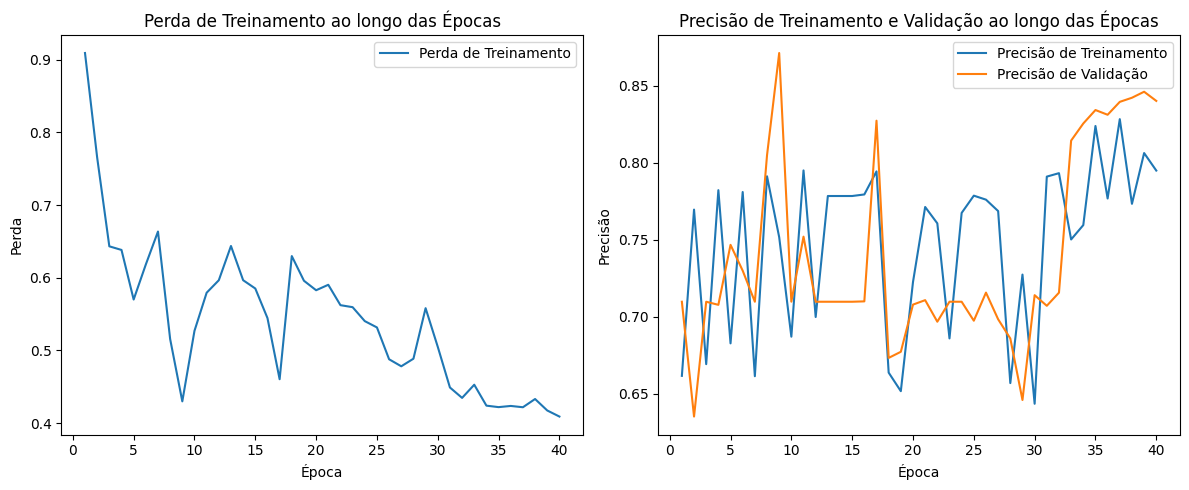

In [17]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_losses) + 1), train_losses, label='Perda de Treinamento')
plt.xlabel('Época')
plt.ylabel('Perda')
plt.title('Perda de Treinamento ao longo das Épocas')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, len(train_accuracies) + 1), train_accuracies, label='Precisão de Treinamento')
plt.plot(range(1, len(val_accuracies) + 1), val_accuracies, label='Precisão de Validação')
plt.xlabel('Época')
plt.ylabel('Precisão')
plt.title('Precisão de Treinamento e Validação ao longo das Épocas')
plt.legend()

plt.tight_layout()
plt.show()

# Inferência de dados
Processo de usar um modelo treinado para fazer previsões sobre novos dados.

C:\Users\Henrique Moreira\AppData\Local\Temp\ipykernel_8204\3878609034.py:11: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_file_name)

Modelo carregado e pronto para uso.


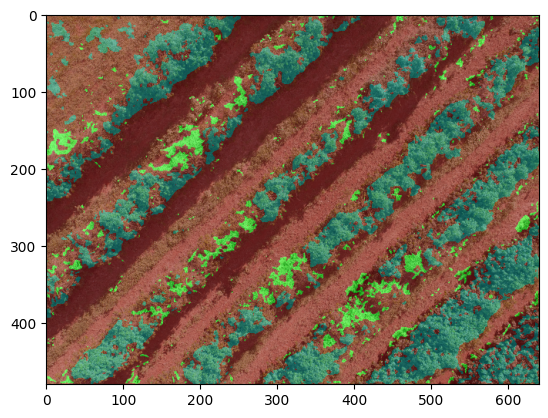

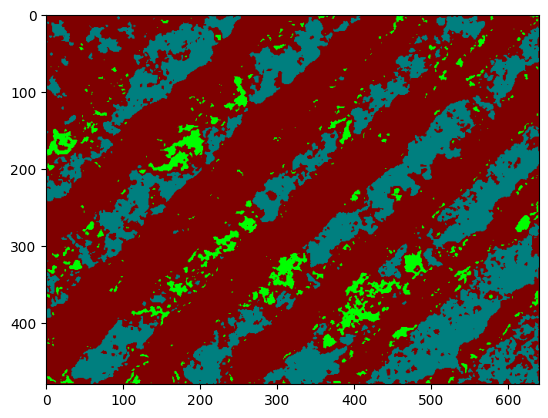

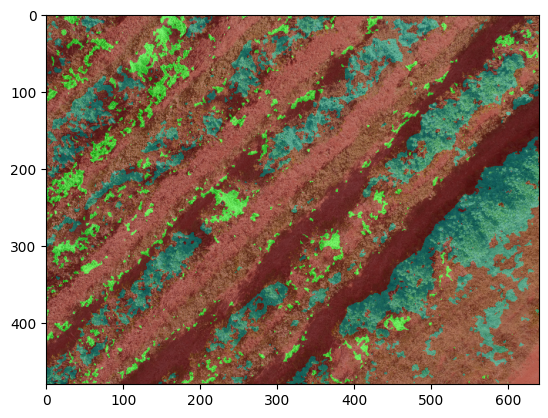

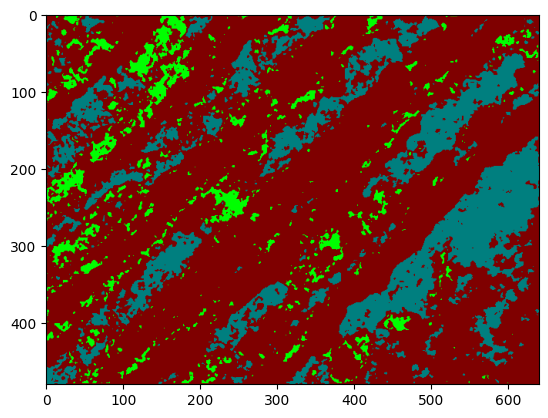

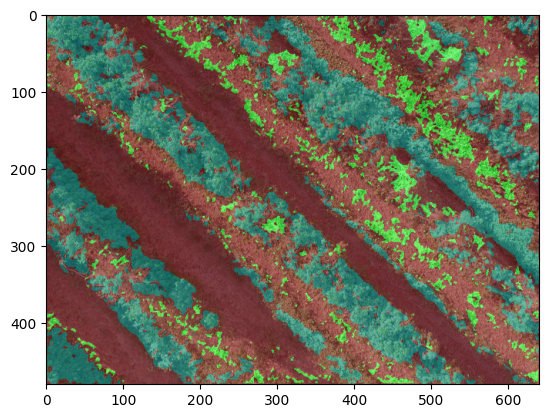

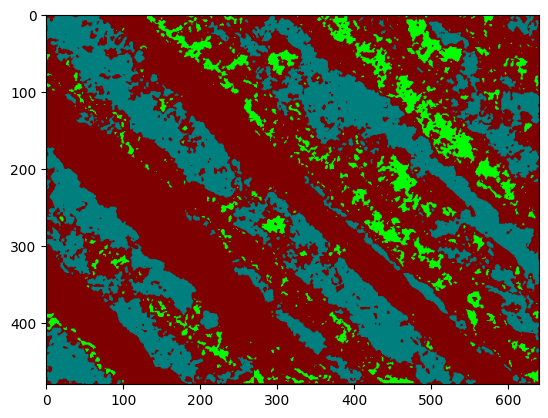

In [18]:
# Color in RGB
class_to_color = {'Ground': (127, 0, 0) , 'Healthy': (0, 127, 127), 'Pest': (0, 255, 0)}
class_to_id = {'Ground': 0, 'Healthy': 1, 'Pest': 2}
id_to_class = {v: k for k, v in class_to_id.items()}
nClasses = 3
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]


model = UNetVgg(nClasses)
model.load_state_dict(torch.load(model_file_name))
model.eval()
print("Modelo carregado e pronto para uso.")
model.to(device)

img_list = glob.glob(osp.join(img_folder_val, '*.png'))

for img_path in img_list:

        img_np = cv2.imread(img_path, cv2.IMREAD_IGNORE_ORIENTATION + cv2.IMREAD_COLOR)
        img_np = cv2.resize(img_np, (resolution_input[0], resolution_input[1]))[..., ::-1]
        img_np = np.ascontiguousarray(img_np)
        
        img_pt = np.copy(img_np).astype(np.float32) / 255.0
        for i in range(3):
            img_pt[..., i] -= mean[i]
            img_pt[..., i] /= std[i]
            
        img_pt = img_pt.transpose(2,0,1)
            
        img_pt = torch.from_numpy(img_pt[None, ...]).to(device)
        
        label_out = model(img_pt)
        label_out = torch.nn.functional.softmax(label_out, dim = 1)
        label_out = label_out.cpu().detach().numpy()
        label_out = np.squeeze(label_out)
        
        labels = np.argmax(label_out, axis=0)
        
        color_label = np.zeros((resolution_input[1], resolution_input[0], 3))
            
        for key, val in id_to_class.items():
            color_label[labels == key] = class_to_color[val]
            
        plt.figure()
        plt.imshow((img_np/255) * 0.5 + (color_label/255) * 0.5)
        plt.savefig(save_dir + "IMG" + ".png")
        plt.show()
        
        plt.figure()
        plt.imshow(color_label.astype(np.uint8))
        plt.savefig(save_dir + "GT" + ".png")
        plt.show()